In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

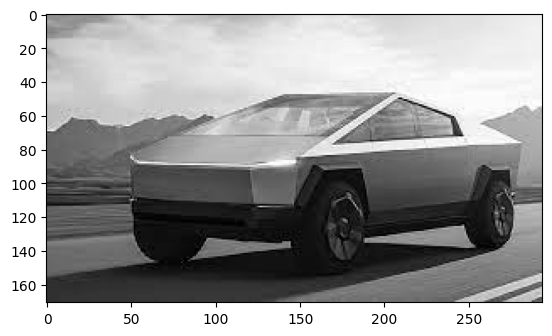

In [2]:
img = cv2.imread('./data/car.png', 0)  #  0을 주면 흑백이됨

plt.imshow(img,'gray')
plt.show()

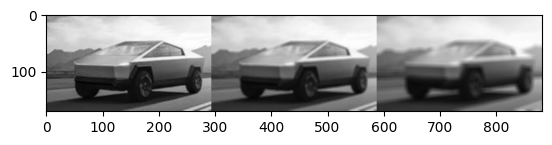

In [3]:
# 이미지 blur
blurred_1 = np.hstack([
    cv2.blur(img,(3,3)),
    cv2.blur(img,(5,5)),
    cv2.blur(img,(9,9))
])

plt.imshow(blurred_1, 'gray')
plt.show()

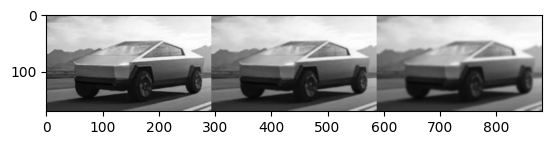

In [4]:
# 가우시안 blur
blurred_1 = np.hstack([
    cv2.GaussianBlur(img,(3,3),0),
    cv2.GaussianBlur(img,(5,5),0),
    cv2.GaussianBlur(img,(9,9),0)
])

plt.imshow(blurred_1, 'gray')
plt.show()

# 이미지 선명화

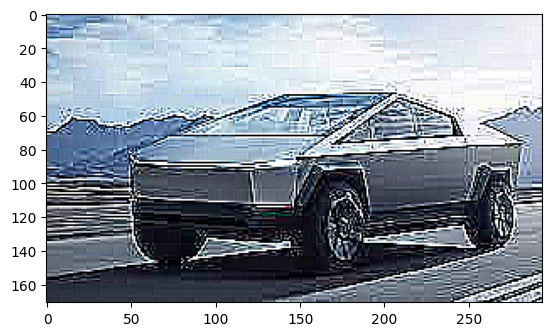

In [11]:
img = cv2.imread('./data/car.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

img_sharpen = cv2.filter2D(img, -1, filter)

plt.imshow(img_sharpen)
plt.show()

# 샤프닝 필터 비전 - 맥시칸 햇, 라플라시안

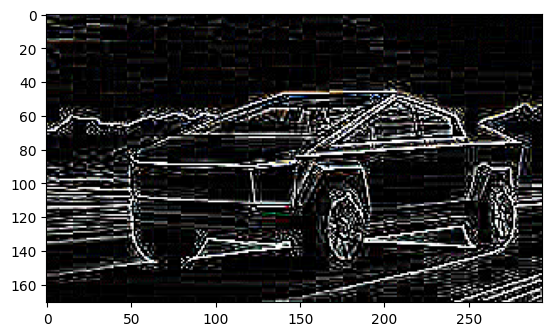

In [6]:
filter = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1], [0,-1,-2,-1,0], [0,0,-1,0,0]])

img_maxican_hat = cv2.filter2D(img,-1,filter)

plt.imshow(img_maxican_hat)
plt.show()

# 커스텀 필터

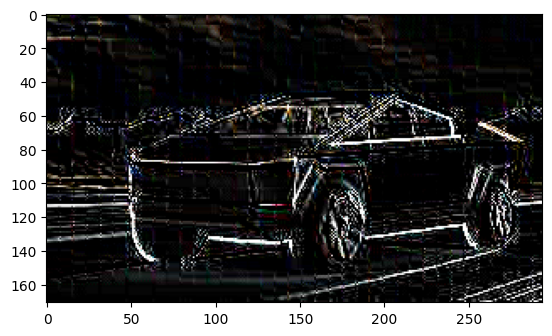

In [7]:
filter = np.array([[3,-2,-3], [-4,8,-6], [5,-1,-0]])

img_custom = cv2.filter2D(img,-1,filter)  # -1 = 출력이 입력과 동일함을 암시, 흑백 > 흑백, RGB > RGB

plt.imshow(img_custom)
plt.show()

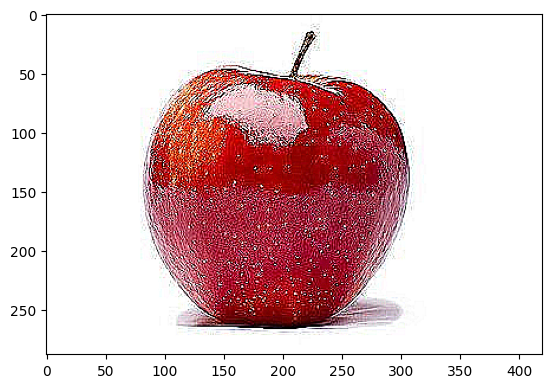

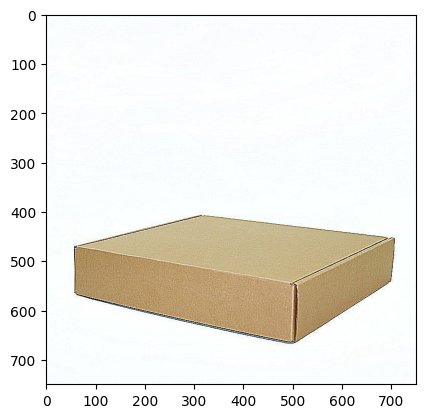

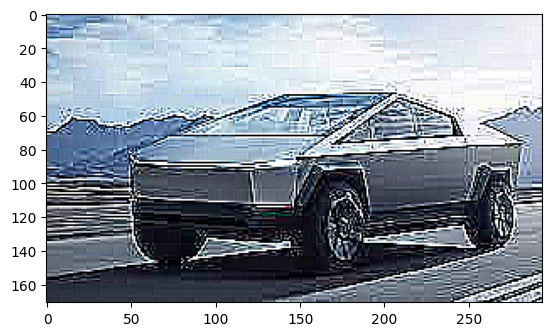

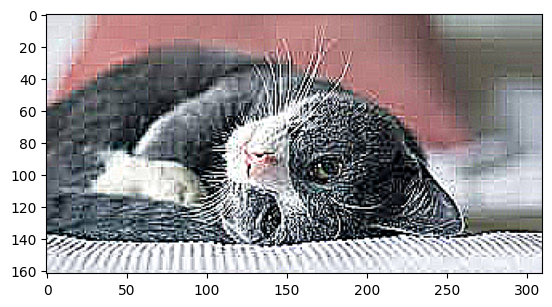

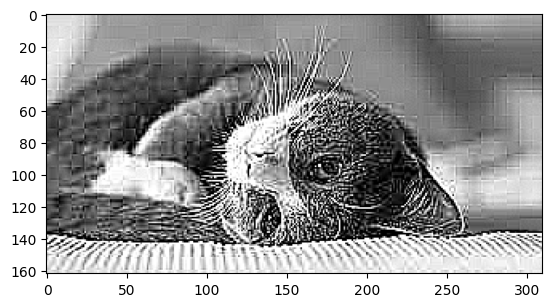

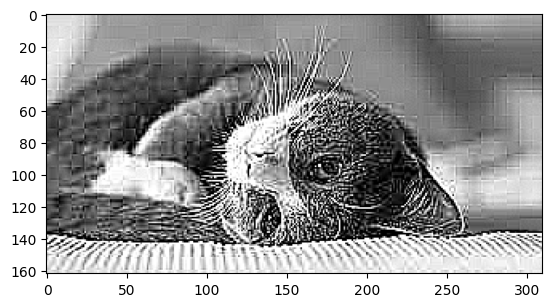

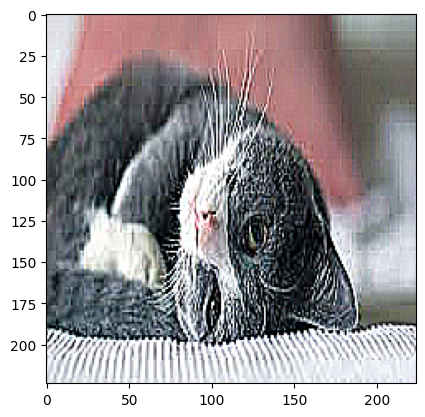

In [12]:
# 여러장의 이미지에 필터 적용
image_list = glob.glob(os.path.join('./data','*.png'))

for path in image_list:
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    img_custom = cv2.filter2D(img,-1,filter)
    
    plt.imshow(img_custom)
    plt.show()

# 다양한 효과 필터

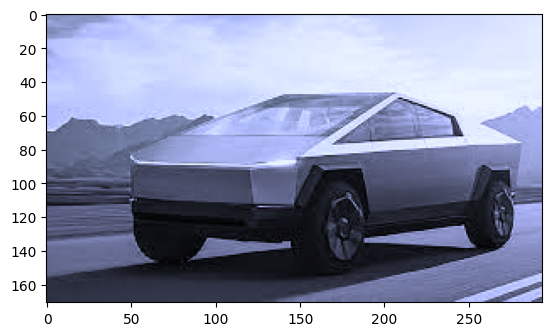

In [20]:
img = cv2.imread('./data/car.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

filter = np.array([[0.272, 0.534, 0.131],
                  [0.119, 0.686, 0.168],
                  [0.393, 0.769, 0.189]])

img_sepia = cv2.transform(img, filter)

plt.imshow(img_sepia)
plt.show()

# 앰보스 효과

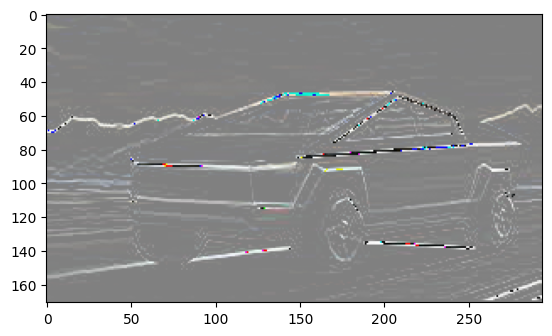

In [21]:
filter = np.array([[0,1,0], [0,0,0], [0,-1,0]])

img_emboss = cv2.filter2D(img, -1, filter)
img_emboss +=128

plt.imshow(img_emboss)
plt.show()

# 확장 & 침식

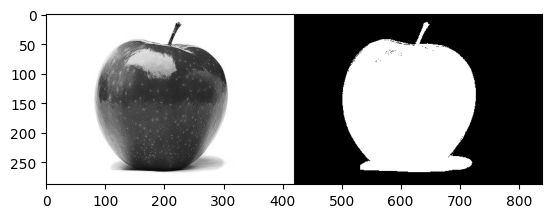

In [27]:
img_gray = cv2.imread('./data/apple.png', 0)

_,mask = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV)

img_list = np.hstack([img_gray, mask])

plt.imshow(img_list,'gray')
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


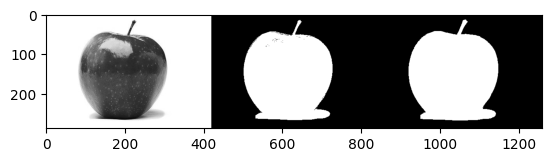

In [29]:
kernel = np.ones((3,3), np.uint8)
print(kernel)

dilation = cv2.dilate(mask, kernel)

img_list = np.hstack([img_gray, mask, dilation])

plt.imshow(img_list,'gray')
plt.show()

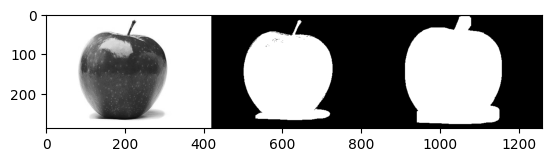

In [30]:
dilation = cv2.dilate(mask, kernel, iterations=10)  # iteration 값 증가보단 커널 크기 증가가 효율적

img_list = np.hstack([img_gray, mask, dilation])

plt.imshow(img_list,'gray')
plt.show()

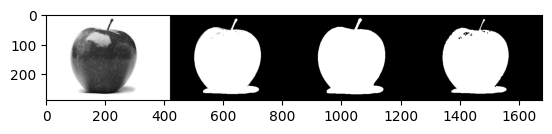

In [34]:
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)

img_list = np.hstack([img_gray, mask, dilation, erosion])

plt.imshow(img_list,'gray')
plt.show()

# 개폐 (팽창후 사용)

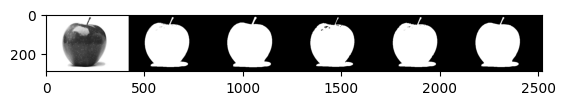

In [36]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

img_list = np.hstack([img_gray, mask, dilation, erosion, opening, closing])

plt.imshow(img_list,'gray')
plt.show()

# 형태학적 기울기 & 탑 햇

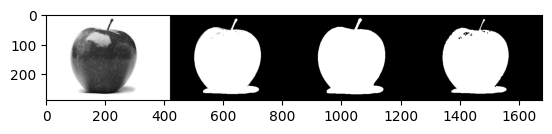

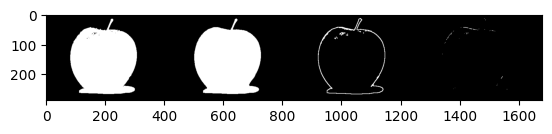

In [38]:
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

img_list = np.hstack([img_gray, mask, dilation, erosion])
img_list2 = np.hstack([opening, closing, mg, th])

plt.imshow(img_list,'gray')
plt.show()
plt.imshow(img_list2,'gray')
plt.show()